In [1]:
#Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
import keras as kr
import sklearn as sk
import matplotlib.pyplot as plt


Using TensorFlow backend.


In [2]:
#Load the data from a CSV file, assuming it is downloaded in home folder
data_train = pd.read_csv('~/Datasets/UNSW-15/all/data_1_clean.csv')


/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data_train['attack_cat'] = data_train['attack_cat'].fillna('Normal')
data_train.head(5)

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,...,0,3,7,1,3,1,1,1,Normal,0
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,...,0,2,4,2,3,1,1,2,Normal,0
2,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,...,0,12,8,1,2,2,1,1,Normal,0
3,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,...,0,6,9,1,1,1,1,1,Normal,0
4,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,...,0,7,9,1,1,1,1,1,Normal,0


In [4]:
print(data_train.dtypes)
data_train.shape

srcip                object
sport                 int64
dstip                object
dsport                int64
proto                object
state                object
dur                 float64
sbytes                int64
dbytes                int64
sttl                  int64
dttl                  int64
sloss                 int64
dloss                 int64
service              object
Sload               float64
Dload               float64
Spkts                 int64
Dpkts                 int64
swin                  int64
dwin                  int64
stcpb                 int64
dtcpb                 int64
smeansz               int64
dmeansz               int64
trans_depth           int64
res_bdy_len           int64
Sjit                float64
Djit                float64
Stime                 int64
Ltime                 int64
Sintpkt             float64
Dintpkt             float64
tcprtt              float64
synack              float64
ackdat              float64
is_sm_ips_ports     

(700001, 49)

In [5]:
#Separate labels/ground truth

train_label_attack_category = np.array(data_train['attack_cat'])
train_label_label = np.array(data_train['Label'])
train_label_attack_category_orig = train_label_attack_category

#Remove labels from data 
data_train = data_train.drop('attack_cat', axis = 1)
data_train = data_train.drop('Label', axis = 1)


In [6]:
X = data_train.select_dtypes(include=[object])
X = X.drop('srcip', axis=1)
X = X.drop('dstip', axis=1)
X.head(5)



,proto,state,service
0,udp,CON,dns
1,udp,CON,-
2,udp,CON,dns
3,udp,CON,dns
4,udp,CON,dns


In [7]:
#One hot encoding
X = pd.get_dummies(X)
X.shape


(700001, 164)

In [8]:



#combine the data
data_wo_X = data_train
data_wo_X = data_wo_X.drop('srcip', axis=1)
data_wo_X = data_wo_X.drop('dstip', axis=1)
data_wo_X = data_wo_X.drop('proto', axis=1)
data_wo_X = data_wo_X.drop('state', axis=1)
data_wo_X = data_wo_X.drop('service', axis=1)
#data_wo_X = data_wo_X.drop('ct_ftp_cmd', axis=1)

data_wo_X.shape
frames = [data_wo_X, X]
data_train = pd.concat(frames, axis=1)
del data_wo_X
del X
del frames
data_train.head(5)

,sport,dsport,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,Sload,...,service_ftp,service_ftp-data,service_http,service_irc,service_pop3,service_radius,service_smtp,service_snmp,service_ssh,service_ssl
0,1390,53,0.001055,132,164,31,29,0,0,500473.93750,...,0,0,0,0,0,0,0,0,0,0
1,33661,1024,0.036133,528,304,31,29,0,0,87676.08594,...,0,0,0,0,0,0,0,0,0,0
2,1464,53,0.001119,146,178,31,29,0,0,521894.53130,...,0,0,0,0,0,0,0,0,0,0
3,3593,53,0.001209,132,164,31,29,0,0,436724.56250,...,0,0,0,0,0,0,0,0,0,0
4,49664,53,0.001169,146,178,31,29,0,0,499572.25000,...,0,0,0,0,0,0,0,0,0,0


In [9]:
#use only top features
#data_train_orig = data_train
data_top = data_train[['sttl', 'ct_state_ttl', 'dttl', 
'Sload', 'Dpkts', 'dmeansz', 'sbytes', 'Dload', 'smeansz',
'tcprtt', 'dsport', 'dur']]
#remove ct_srv_dst
#remove state_INT
data_train = data_top
data_top.head(100)


,sttl,ct_state_ttl,dttl,Sload,Dpkts,dmeansz,sbytes,Dload,smeansz,tcprtt,dsport,dur
0,31,0,29,5.004739e+05,2,82,132,6.218009e+05,66,0.000000,53,0.001055
1,31,0,29,8.767609e+04,4,76,528,5.048017e+04,132,0.000000,1024,0.036133
2,31,0,29,5.218945e+05,2,89,146,6.362824e+05,73,0.000000,53,0.001119
3,31,0,29,4.367246e+05,2,82,132,5.425972e+05,66,0.000000,53,0.001209
4,31,0,29,4.995722e+05,2,89,146,6.090676e+05,73,0.000000,53,0.001169
5,31,0,29,4.350323e+04,4,78,568,2.389614e+04,142,0.000000,111,0.078339
6,31,0,29,4.656085e+05,2,82,132,5.784832e+05,66,0.000000,53,0.001134
7,0,2,0,0.000000e+00,0,0,46,0.000000e+00,46,0.000000,0,0.000000
8,31,0,29,5.186501e+05,2,89,146,6.323268e+05,73,0.000000,53,0.001126
9,31,0,29,4.524422e+05,2,82,132,5.621251e+05,66,0.000000,53,0.001167


In [10]:
#del frames
#del data_train_one_hot

In [11]:
#save original data before splitting into train and test
#data_train = data_train_one_hot
#data_train_orig = data_train_one_hot
#get feature names
feature_list = list(data_train.columns)
feature_list

['sttl',
 'ct_state_ttl',
 'dttl',
 'Sload',
 'Dpkts',
 'dmeansz',
 'sbytes',
 'Dload',
 'smeansz',
 'tcprtt',
 'dsport',
 'dur']

In [12]:
#convert to numpy array
#data_test = np.array(data_test)
data_train = np.array(data_train)


In [13]:
#transform string labels to values
from sklearn import preprocessing
lencoder = preprocessing.LabelEncoder()

lencoder.fit(train_label_attack_category)
list(lencoder.classes_)
train_label_attack_category = lencoder.transform(train_label_attack_category)

#test_label_attack_category = lencoder.transform(test_label_attack_category)

lencoder.fit(train_label_label)

train_label_label = lencoder.transform(train_label_label)

#test_label_label = lencoder.transform(test_label_label)


In [14]:
#Some bug causes to have more columns in test data
#thus lets just work with train_data and split it

from sklearn.model_selection import train_test_split
data_train, data_test, train_labels, test_labels = train_test_split(data_train, train_label_label, test_size = 0.25, random_state = 50)
print('shapes', data_test.shape, data_train.shape)

shapes (175001, 12) (525000, 12)


In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.feature_selection import SelectFromModel

rf = RandomForestClassifier(n_estimators = 5, n_jobs=2, random_state=0, max_depth=10)

rf.fit(data_train, train_labels)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=2,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [16]:
#predictions on test data
predictions = rf.predict(data_test)

#errors

errors = abs(predictions - test_labels)

#mean absolute error
print('Mean Absolute error', round(np.mean(errors), 2), 'degrees')

Mean Absolute error 0.0 degrees


In [17]:
#features = df.columns[:4]

# View features
#features

In [18]:
predictions

rf.predict_proba(data_test)[0:10]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [19]:
# Create confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(test_labels, predictions)

array([[169205,    275],
       [   323,   5198]])

In [20]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(test_labels, predictions)

(array([0.99809471, 0.94975333]),
 array([0.99837739, 0.94149611]),
 array([0.99823603, 0.94560669]),
 array([169480,   5521]))

In [21]:
precision_recall_fscore_support(test_labels, predictions, average='macro')

(0.9739240222849191, 0.9699367477202179, 0.9719213621944369, None)

In [22]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / (test_labels+1))

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 99.75 %.


In [23]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];


Variable: sttl                 Importance: 0.31
Variable: ct_state_ttl         Importance: 0.27
Variable: dmeansz              Importance: 0.1
Variable: Dpkts                Importance: 0.07
Variable: Dload                Importance: 0.07
Variable: tcprtt               Importance: 0.07
Variable: dsport               Importance: 0.05
Variable: smeansz              Importance: 0.03
Variable: Sload                Importance: 0.02
Variable: dttl                 Importance: 0.01
Variable: sbytes               Importance: 0.01
Variable: dur                  Importance: 0.0


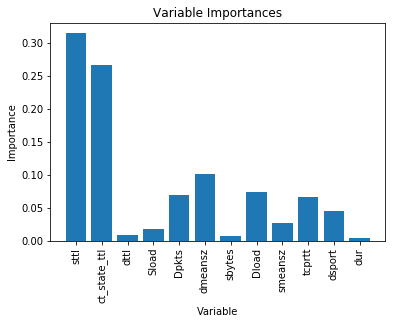

In [24]:
# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [25]:
list(zip(data_train, rf.feature_importances_))

[(array([2.54000000e+02, 2.00000000e+00, 0.00000000e+00, 1.33333328e+08,
         0.00000000e+00, 0.00000000e+00, 2.00000000e+02, 0.00000000e+00,
         1.00000000e+02, 0.00000000e+00, 0.00000000e+00, 6.00000000e-06]),
  0.31496343514282815),
 (array([3.10000000e+01, 0.00000000e+00, 2.90000000e+01, 1.51989000e+07,
         6.00000000e+00, 5.30000000e+01, 8.92800000e+03, 4.89459188e+05,
         6.38000000e+02, 5.84000000e-04, 4.91600000e+04, 4.36400000e-03]),
  0.26705435519560683),
 (array([3.10000000e+01, 0.00000000e+00, 2.90000000e+01, 7.49670000e+05,
         4.00000000e+00, 7.80000000e+01, 5.68000000e+02, 4.11790562e+05,
         1.42000000e+02, 0.00000000e+00, 1.11000000e+02, 4.54600000e-03]),
  0.007810164929433036),
 (array([3.10000000e+01, 0.00000000e+00, 2.90000000e+01, 4.03255094e+05,
         4.40000000e+01, 5.36000000e+02, 2.64600000e+03, 3.60135050e+06,
         6.30000000e+01, 6.49000000e-04, 4.32640000e+04, 5.12430000e-02]),
  0.017118919980129398),
 (array([3.1000000

In [26]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(data_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))


Feature ranking:
1. feature 0 (0.314963)
2. feature 1 (0.267054)
3. feature 5 (0.100700)
4. feature 7 (0.074280)
5. feature 4 (0.068534)
6. feature 9 (0.066856)
7. feature 10 (0.045659)
8. feature 8 (0.026773)
9. feature 3 (0.017119)
10. feature 2 (0.007810)
11. feature 6 (0.006850)
12. feature 11 (0.003401)


In [27]:
rf.n_features_

12

In [28]:
#Lets check category wise
train_label_attack_category_orig

array(['Normal', 'Normal', 'Normal', ..., 'Normal', 'Normal', 'Normal'],
      dtype=object)

In [29]:
from sklearn import tree
from sklearn.tree import export_text
i_tree = 0
for tree_in_forest in rf.estimators_:
    with open('tree_' + str(i_tree) + '.dot', 'w') as my_file:
        my_file = tree.export_graphviz(tree_in_forest, out_file = my_file)
        r = export_text(tree_in_forest)
        print("TREE ", i_tree)
        print(r)  
    i_tree = i_tree + 1

TREE  0
|--- feature_9 <= 0.02
|   |--- feature_4 <= 0.50
|   |   |--- feature_1 <= 1.00
|   |   |   |--- feature_10 <= 61.00
|   |   |   |   |--- class: 0.0
|   |   |   |--- feature_10 >  61.00
|   |   |   |   |--- feature_8 <= 1500.50
|   |   |   |   |   |--- feature_8 <= 504.00
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- feature_8 >  504.00
|   |   |   |   |   |   |--- feature_8 <= 550.50
|   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |--- feature_8 >  550.50
|   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- feature_8 >  1500.50
|   |   |   |   |   |--- class: 1.0
|   |   |--- feature_1 >  1.00
|   |   |   |--- feature_0 <= 31.00
|   |   |   |   |--- feature_6 <= 53.00
|   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- feature_6 >  53.00
|   |   |   |   |   |--- feature_6 <= 76.00
|   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |--- feature_6 >  76.00
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |--- f

In [30]:
import pickle as pickle
filename = 'final_rf_model_5trees.sav'
pickle.dump(rf, open(filename, 'wb'))

In [31]:
one_hot_train_label_attack_category_orig = pd.get_dummies(train_label_attack_category_orig)
one_hot_train_label_attack_category_orig.describe()
print(one_hot_train_label_attack_category_orig.sum(axis=0))

 Fuzzers            5051
Analysis             526
Backdoors            534
DoS                 1167
Exploits            5409
Generic             7522
Normal            677786
Reconnaissance      1759
Shellcode            223
Worms                 24
dtype: int64


In [32]:
#Attack: Analysis
data_train = data_train_orig
data_label = np.array(one_hot_train_label_attack_category_orig['Analysis'])
data_train, data_test, train_labels, test_labels = train_test_split(data_train, data_label, test_size = 0.25, random_state = 50)
print('shapes', data_test.shape, data_train.shape)
print(np.sum(test_labels, axis = 0))
weight = 100

sample_weight = np.array([weight if i == 1 else 1 for i in train_labels])
sample_weight

NameError: name 'data_train_orig' is not defined

In [ ]:
rf = RandomForestClassifier(n_estimators = 5, n_jobs=2, random_state=0, max_depth=10)

rf.fit(data_train, train_labels, sample_weight)

#predictions on test data
predictions = rf.predict(data_test)
confusion_matrix(test_labels, predictions)

In [ ]:
precision_recall_fscore_support(test_labels, predictions, average='macro')

In [ ]:
#Attack: Backdoor
weight = 100

data_train = data_train_orig
data_label = np.array(one_hot_train_label_attack_category_orig['Backdoors'])
data_train, data_test, train_labels, test_labels = train_test_split(data_train, data_label, test_size = 0.25, random_state = 50)
print('shapes', data_test.shape, data_train.shape)
print(np.sum(test_labels, axis = 0))


sample_weight = np.array([weight if i == 1 else 1 for i in train_labels])

rf = RandomForestClassifier(n_estimators = 10, n_jobs=2, random_state=0, max_depth=10)

rf.fit(data_train, train_labels, sample_weight)

#predictions on test data
predictions = rf.predict(data_test)
confusion_matrix(test_labels, predictions)


In [ ]:
precision_recall_fscore_support(test_labels, predictions, average='macro')

In [ ]:
#Attack: DoS
weight = 10

data_train = data_train_orig
data_label = np.array(one_hot_train_label_attack_category_orig['DoS'])
data_train, data_test, train_labels, test_labels = train_test_split(data_train, data_label, test_size = 0.25, random_state = 50)
print('shapes', data_test.shape, data_train.shape)
print(np.sum(test_labels, axis = 0))


sample_weight = np.array([weight if i == 1 else 1 for i in train_labels])

rf = RandomForestClassifier(n_estimators = 10, n_jobs=2, random_state=0, max_depth=10)

rf.fit(data_train, train_labels, sample_weight)

#predictions on test data
predictions = rf.predict(data_test)
confm = confusion_matrix(test_labels, predictions)
print(confm)
precision_recall_fscore_support(test_labels, predictions, average='macro')

In [ ]:
#Attack: Exploits
weight = 5

data_train = data_train_orig
data_label = np.array(one_hot_train_label_attack_category_orig['Exploits'])
data_train, data_test, train_labels, test_labels = train_test_split(data_train, data_label, test_size = 0.25, random_state = 50)
print('shapes', data_test.shape, data_train.shape)
print(np.sum(test_labels, axis = 0))


sample_weight = np.array([weight if i == 1 else 1 for i in train_labels])

rf = RandomForestClassifier(n_estimators = 10, n_jobs=2, random_state=0, max_depth=10)

rf.fit(data_train, train_labels, sample_weight)

#predictions on test data
predictions = rf.predict(data_test)
confm = confusion_matrix(test_labels, predictions)
print(confm)
precision_recall_fscore_support(test_labels, predictions, average='macro')

In [ ]:
#Attack: Fuzzers
weight = 10

data_train = data_train_orig
data_label = np.array(one_hot_train_label_attack_category_orig[' Fuzzers'])
data_train, data_test, train_labels, test_labels = train_test_split(data_train, data_label, test_size = 0.25, random_state = 50)
print('shapes', data_test.shape, data_train.shape)
print(np.sum(test_labels, axis = 0))


sample_weight = np.array([weight if i == 1 else 1 for i in train_labels])

rf = RandomForestClassifier(n_estimators = 10, n_jobs=2, random_state=0, max_depth=10)

rf.fit(data_train, train_labels, sample_weight)

#predictions on test data
predictions = rf.predict(data_test)
confm = confusion_matrix(test_labels, predictions)
print(confm)
precision_recall_fscore_support(test_labels, predictions, average='macro')

In [ ]:
#Attack: Generic
weight = 1

data_train = data_train_orig
data_label = np.array(one_hot_train_label_attack_category_orig['Generic'])
data_train, data_test, train_labels, test_labels = train_test_split(data_train, data_label, test_size = 0.25, random_state = 50)
print('shapes', data_test.shape, data_train.shape)
print(np.sum(test_labels, axis = 0))


sample_weight = np.array([weight if i == 1 else 1 for i in train_labels])

rf = RandomForestClassifier(n_estimators = 10, n_jobs=2, random_state=0, max_depth=10)

rf.fit(data_train, train_labels, sample_weight)

#predictions on test data
predictions = rf.predict(data_test)
confm = confusion_matrix(test_labels, predictions)
print(confm)
precision_recall_fscore_support(test_labels, predictions, average='macro')

In [ ]:
#Attack: Reconnaissance
weight = 10

data_train = data_train_orig
data_label = np.array(one_hot_train_label_attack_category_orig['Reconnaissance'])
data_train, data_test, train_labels, test_labels = train_test_split(data_train, data_label, test_size = 0.25, random_state = 50)
print('shapes', data_test.shape, data_train.shape)
print(np.sum(test_labels, axis = 0))


sample_weight = np.array([weight if i == 1 else 1 for i in train_labels])

rf = RandomForestClassifier(n_estimators = 10, n_jobs=2, random_state=0, max_depth=10)

rf.fit(data_train, train_labels, sample_weight)

#predictions on test data
predictions = rf.predict(data_test)
confm = confusion_matrix(test_labels, predictions)
print(confm)
precision_recall_fscore_support(test_labels, predictions, average='macro')

In [ ]:
#Attack: Shellcode
weight = 1000

data_train = data_train_orig
data_label = np.array(one_hot_train_label_attack_category_orig['Shellcode'])
data_train, data_test, train_labels, test_labels = train_test_split(data_train, data_label, test_size = 0.25, random_state = 50)
print('shapes', data_test.shape, data_train.shape)
print(np.sum(test_labels, axis = 0))


sample_weight = np.array([weight if i == 1 else 1 for i in train_labels])

rf = RandomForestClassifier(n_estimators = 10, n_jobs=2, random_state=0, max_depth=10)

rf.fit(data_train, train_labels, sample_weight)

#predictions on test data
predictions = rf.predict(data_test)
confm = confusion_matrix(test_labels, predictions)
print(confm)
precision_recall_fscore_support(test_labels, predictions, average='macro')

In [ ]:
#Attack: Worms
weight = 1000

data_train = data_train_orig
data_label = np.array(one_hot_train_label_attack_category_orig['Worms'])
data_train, data_test, train_labels, test_labels = train_test_split(data_train, data_label, test_size = 0.25, random_state = 50)
print('shapes', data_test.shape, data_train.shape)
print(np.sum(test_labels, axis = 0))


sample_weight = np.array([weight if i == 1 else 1 for i in train_labels])

rf = RandomForestClassifier(n_estimators = 10, n_jobs=2, random_state=0, max_depth=10)

rf.fit(data_train, train_labels, sample_weight)

#predictions on test data
predictions = rf.predict(data_test)
confm = confusion_matrix(test_labels, predictions)
print(confm)
precision_recall_fscore_support(test_labels, predictions, average='macro')